In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [3]:
dfr= pd.read_excel("data.xlsx")

In [4]:
dfr.head()

,Year,Prod
0,1995,21829000
1,1996,16239000
2,1997,15000000
3,1998,14268000
4,1999,18250000


In [13]:
msk1 = (dfr.index < len(dfr)-7)
dfr_train = dfr[msk1].copy()
dfr_test = dfr[~msk1].copy()

In [15]:
dfr_train

,Year,Prod
0,1995,21829000
1,1996,16239000
2,1997,15000000
3,1998,14268000
4,1999,18250000
5,2000,16098000
6,2001,18250000
7,2002,19796000
8,2003,14175000
9,2004,28858000


In [16]:
dfr_test

,Year,Prod
20,2015,18793308
21,2016,18641135
22,2017,18670718
23,2018,21313341
24,2019,23361163
25,2020,20334106
26,2021,19466881


In [17]:
# Stationarity testing with adfuler
test_adfuller = adfuller(dfr_train["Prod"])
print(f'p-value: {test_adfuller[1]}')


p-value: 0.08014241249043841


<AxesSubplot:>

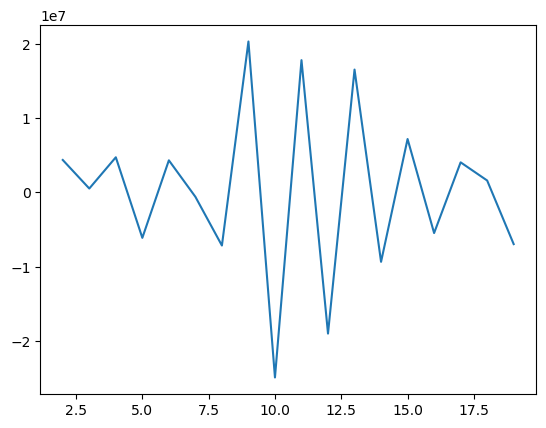

In [21]:
# Not stationary as p_value is greater than 0.05
dfr_train_diff = dfr_train["Prod"].diff().diff().dropna()
dfr_train_diff.plot()

In [22]:
test_adfuller1 = adfuller(dfr_train_diff)
print(f'p-value: {test_adfuller1[1]}')

p-value: 0.0


 The pmdarima Python package. It offers automatic ARIMA modeling based on the statsmodels library that we’ve been using.

In [31]:
auto_arima = pm.auto_arima(dfr_train["Prod"], stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [32]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(dfr_train["Prod"], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=622.644, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=640.293, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=624.894, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=630.379, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=638.398, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=631.021, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=627.941, Time=0.04 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=620.150, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=627.607, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=622.564, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=623.328, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.16 se

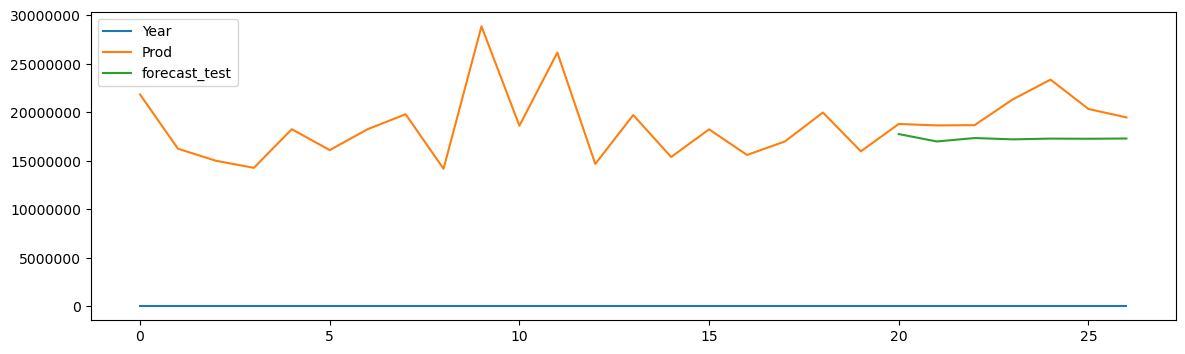

In [58]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,4)
forecast_test = model.predict(n_periods=len(dfr_test),dynamic=True)
dfr['forecast_test'] = [None]*len(dfr_train) + list(forecast_test)
# forecast_test.plot()
dfr.plot()
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)



In [103]:
# model = ARIMA(train, order=(3,2,1))  
model1 = ARIMA(dfr_train["Prod"], order=(1,2,1))  
fitted = model1.fit()  
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Prod   No. Observations:                   20
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -307.075
Date:                Sun, 15 Jan 2023   AIC                            620.150
Time:                        22:33:15   BIC                            622.821
Sample:                             0   HQIC                           620.518
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4398      0.083     -5.296      0.000      -0.603      -0.277
ma.L1         -0.8361      0.144     -5.821      0.000      -1.118      -0.555
sigma2      2.229e+13   1.87e-15    1.2e+28      0.000    2.23e+13    2.23e+13
===================================================================================
Ljung-Box (L1) (Q):                   1.76   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.18   Prob(JB):                         0.83
Heteroskedasticity (H):               0.14   Skew:                             0.22
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

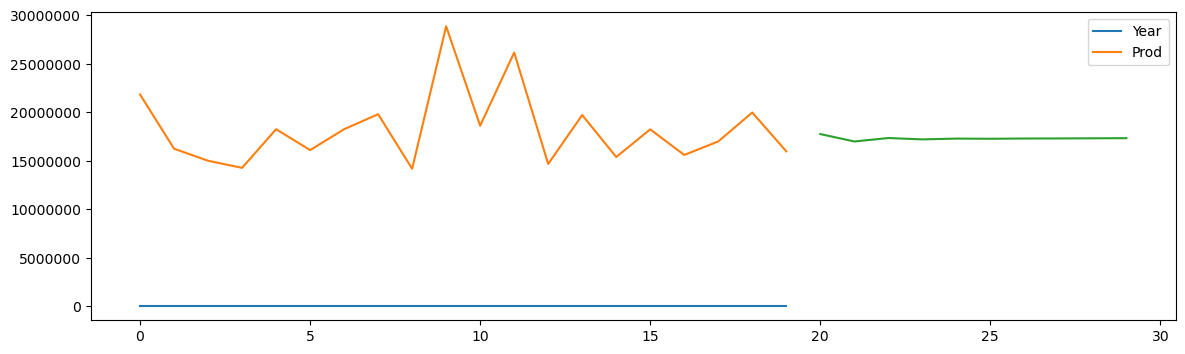

In [137]:
# Forecast
plt.rcParams["figure.figsize"] = (14,4)
fc= fitted.forecast(10, alpha=0.05)  # 95% conf
dfr_train.plot()
fc.plot()
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

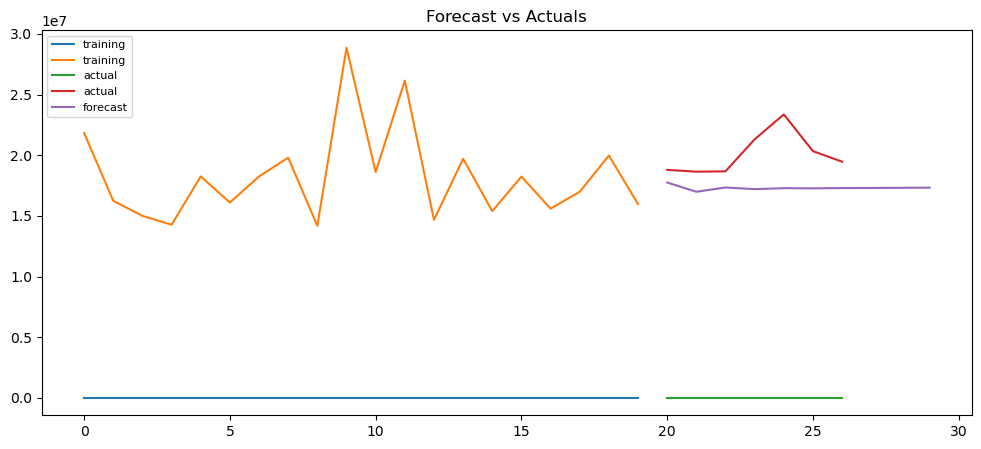

In [146]:
# Make as pandas series
fc_series = pd.Series(fc)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(dfr_train, label='training')
plt.plot(dfr_test, label='actual')
plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [138]:
dfr_train

,Year,Prod
0,1995,21829000
1,1996,16239000
2,1997,15000000
3,1998,14268000
4,1999,18250000
5,2000,16098000
6,2001,18250000
7,2002,19796000
8,2003,14175000
9,2004,28858000


In [139]:
fc

20    1.774945e+07
21    1.698676e+07
22    1.734064e+07
23    1.720344e+07
24    1.728222e+07
25    1.726602e+07
26    1.729159e+07
27    1.729878e+07
28    1.731406e+07
29    1.732578e+07
Name: predicted_mean, dtype: float64

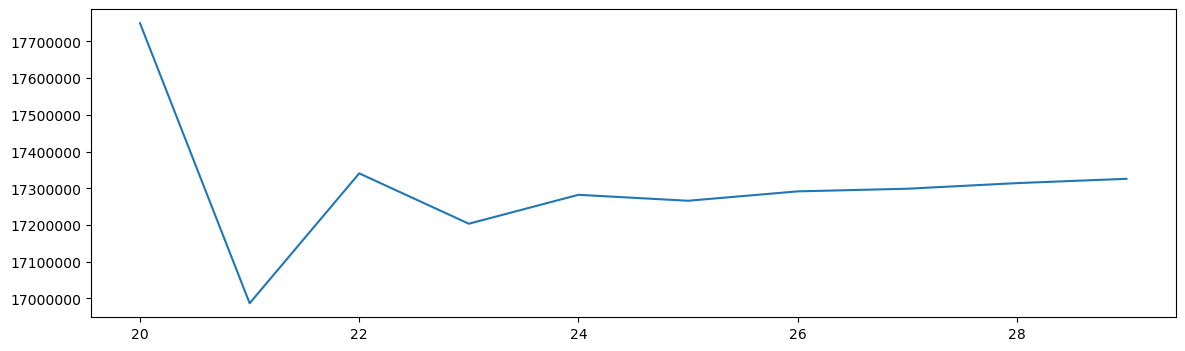

In [140]:
fc.plot()
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

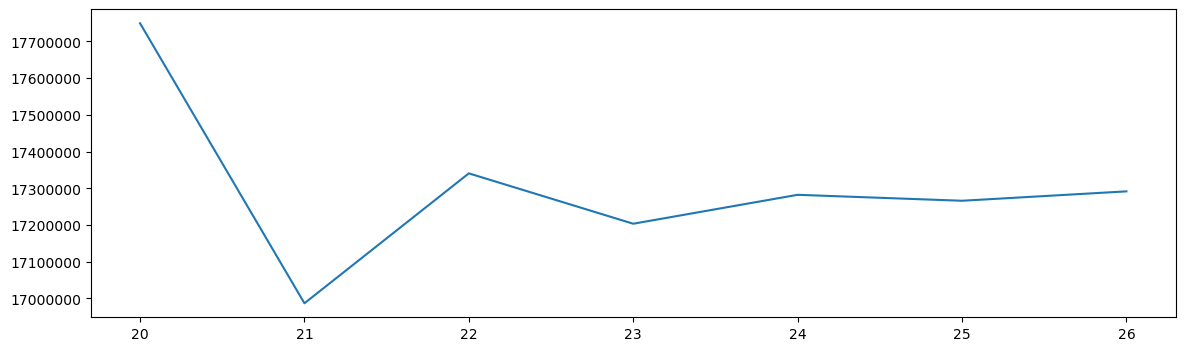

In [109]:
forecast_test.plot()
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

In [56]:
dfr.tail()

,Year,Prod,forecast_test
22,2017,18670718,1.734064e+07
23,2018,21313341,1.720344e+07
24,2019,23361163,1.728222e+07
25,2020,20334106,1.726602e+07
26,2021,19466881,1.729159e+07


In [126]:
x= dfr_train
x

,Year,Prod
0,1995,21829000
1,1996,16239000
2,1997,15000000
3,1998,14268000
4,1999,18250000
5,2000,16098000
6,2001,18250000
7,2002,19796000
8,2003,14175000
9,2004,28858000


In [133]:
y= fc
y

20    1.774945e+07
21    1.698676e+07
22    1.734064e+07
23    1.720344e+07
24    1.728222e+07
25    1.726602e+07
26    1.729159e+07
27    1.729878e+07
28    1.731406e+07
29    1.732578e+07
Name: predicted_mean, dtype: float64

In [131]:
df2 = pd.DataFrame(x,y)

In [132]:
df2

,Year,Prod
predicted_mean,,
1.774945e+07,NaN,NaN
1.698676e+07,NaN,NaN
1.734064e+07,NaN,NaN
1.720344e+07,NaN,NaN
1.728222e+07,NaN,NaN
1.726602e+07,NaN,NaN
1.729159e+07,NaN,NaN
1.729878e+07,NaN,NaN
1.731406e+07,NaN,NaN


In [134]:
dfr

,Year,Prod,forecast_test
0,1995,21829000,NaN
1,1996,16239000,NaN
2,1997,15000000,NaN
3,1998,14268000,NaN
4,1999,18250000,NaN
5,2000,16098000,NaN
6,2001,18250000,NaN
7,2002,19796000,NaN
8,2003,14175000,NaN
9,2004,28858000,NaN
